<a href="https://colab.research.google.com/github/AceRb6/Analitica-y-visualizacion-avanzada-de-datos/blob/main/Practica_09_AVDA_CPIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1xqTV84h_HCBTjZSjOzTCUKNDOEAXjTEc' -O data.csv

data = read_csv('data.csv')

display(data.head())

--2025-05-07 07:58:43--  https://drive.google.com/uc?export=download&id=1xqTV84h_HCBTjZSjOzTCUKNDOEAXjTEc
Resolving drive.google.com (drive.google.com)... 74.125.20.138, 74.125.20.102, 74.125.20.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1xqTV84h_HCBTjZSjOzTCUKNDOEAXjTEc&export=download [following]
--2025-05-07 07:58:43--  https://drive.usercontent.google.com/download?id=1xqTV84h_HCBTjZSjOzTCUKNDOEAXjTEc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.142.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443675 (433K) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>] 433.28K  --.-KB/s    in 0.00

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
display(data.describe())
display(data.info())

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  bool   
 1   student  10000 non-null  bool   
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: bool(2), float64(2)
memory usage: 175.9 KB


None

In [ ]:
# Codificacion de las categorias
for col in ['default', 'student']:
    data[col] = data[col].replace({'Yes': True, 'No': False})

<ipython-input-5-b3f3a4dc07b0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'Yes': True, 'No': False})


In [ ]:
from sklearn.model_selection import train_test_split
X = data[['balance']]
y = data['default']

# Separar el dataset en un 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


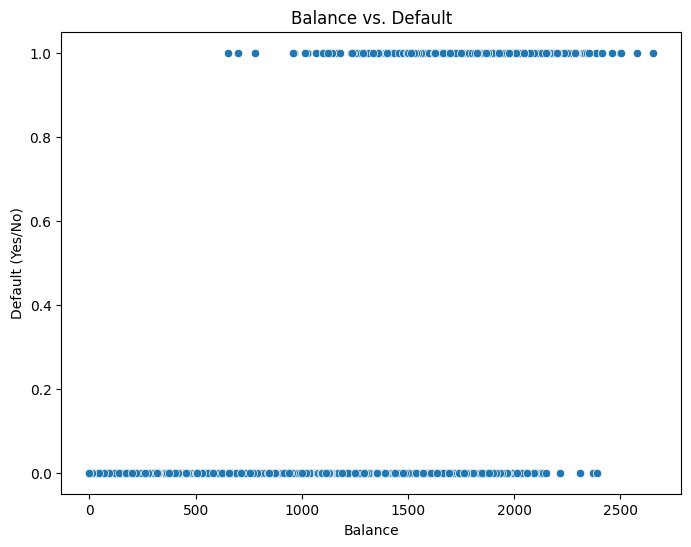

In [ ]:
# Grafica Blanace vs default
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='balance', y='default', data=data)
plt.title('Balance vs. Default')
plt.xlabel('Balance')
plt.ylabel('Default (Yes/No)')
plt.show()


Coeficientes: [[0.00564782]]
Intercepto: [-10.91699938]


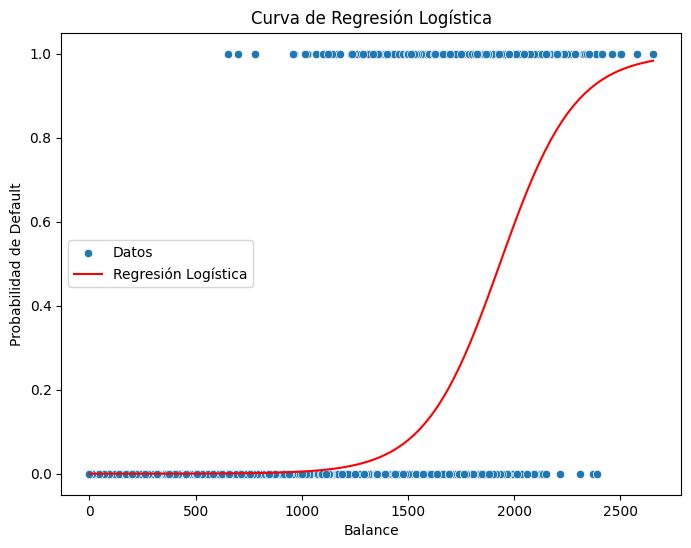

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo de regresión logística
logreg = LogisticRegression()
X_train_reshaped = X_train.values.reshape(-1, 1) # Reshape X_train para que sea una matriz 2D
logreg.fit(X_train_reshaped, y_train)

# Obtener los coeficientes
coefficients = logreg.coef_
intercept = logreg.intercept_

print("Coeficientes:", coefficients)
print("Intercepto:", intercept)

# Obtener la curva de la regresión logística
import numpy as np
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # Crear un rango de valores para X
y_pred_proba = logreg.predict_proba(X_range)[:, 1] # Obtener las probabilidades para la clase 1


# Graficar la curva de la regresión logística
plt.figure(figsize=(8, 6))
sns.scatterplot(x='balance', y='default', data=data, label='Datos') # Datos originales
plt.plot(X_range, y_pred_proba, color='red', label='Regresión Logística') # Curva de regresión logística
plt.title('Curva de Regresión Logística')
plt.xlabel('Balance')
plt.ylabel('Probabilidad de Default')
plt.legend()
plt.show()


In [ ]:
# Calcular la predicción de probabilidades y la asignación con umbral de 0.5
y_pred_proba_test = logreg.predict_proba(X_test.values.reshape(-1, 1))[:, 1]
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Imprimir las predicciones de probabilidad y la asignación
print("Predicciones de Probabilidad:\n", y_pred_proba_test)
print("\nAsignación (Umbral 0.5):\n", y_pred_test)


Predicciones de Probabilidad:
 [5.68595356e-02 1.41661017e-03 1.81467782e-05 ... 2.11721401e-05
 3.56283131e-02 9.80549670e-05]

Asignación (Umbral 0.5):
 [0 0 0 ... 0 0 0]


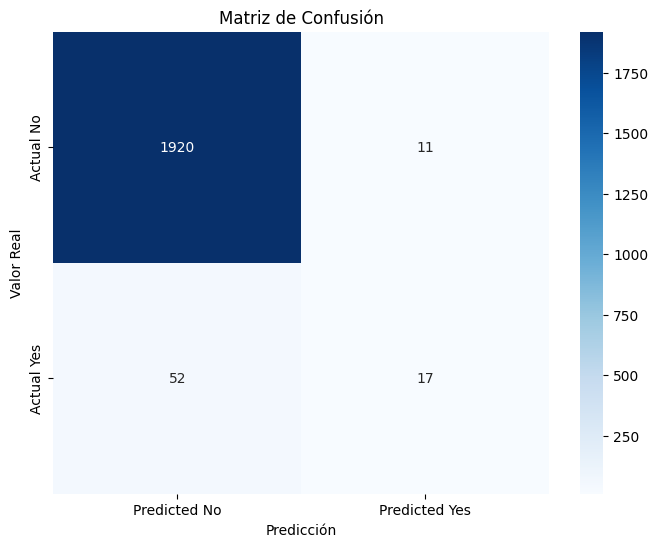

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


El análisis de regresión logística realizado muestra que el balance de una cuenta tiene un impacto significativo en la probabilidad de que ocurra un default. El coeficiente positivo obtenido, $0.0056$, indica que a medida que el balance aumenta, también lo hace la probabilidad de default. Esto sugiere que los individuos con balances más altos tienen un mayor riesgo de no poder pagar sus deudas. Por otro lado, el intercepto negativo, $−10.92$, ajusta la línea de base de la probabilidad, mostrando que la probabilidad de default es baja para balances pequeños.

Al evaluar el modelo con datos de prueba, las predicciones de probabilidad resultaron en valores muy bajos, lo que llevó a que la mayoría de las asignaciones fueran clasificadas como "No Default" al usar un umbral de $0.5$. Esto se refleja en la matriz de confusión, donde el modelo predice correctamente la mayoría de los casos de "No Default", pero tiene dificultades para identificar los casos de "Default". Este resultado destaca la necesidad de mejorar la capacidad del modelo para detectar defaults, posiblemente incorporando más características o ajustando el modelo para manejar mejor el desequilibrio de clases.